In [3]:
import os
import sys
import math
import seaborn as sns
import matplotlib.pyplot as plt
# Adicionando o caminho para a pasta src no sys.path
sys.path.append(os.path.abspath('../src'))
from data_preprocessing import load_data, categorical_columns

,ID_CLIENTE,NOME,CREDITSCORE,LOCALIDADE,GENERO,IDADE,ANOS_CLIENTE_BANCO,SALDO,NUM_PRODUCTS,TEM_CARTAO_CREDITO,MEMBRO_ATIVO,SALARIO_ESTIMADO,CHURN,TEM_RECLAMACAO,SCORE_SATISFACAO,TIPO_CARTAO,PONTO_ADQUIRIDO
0,15634602,Hargrave,619,France,Feminino,42,2,0.00,1,1,1,101348.88,1,1,2,Diamond,464
1,15647311,Hill,608,Spain,Feminino,41,1,83807.86,1,0,1,112542.58,0,1,3,Diamond,456
2,15619304,Onio,502,France,Feminino,42,8,159660.80,3,1,0,113931.57,1,1,3,Diamond,377
3,15701354,Boni,699,France,Feminino,39,1,0.00,2,0,0,93826.63,0,0,5,Gold,350
4,15737888,Mitchell,850,Spain,Feminino,43,2,125510.82,1,1,1,79084.10,0,0,5,Gold,425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_CLIENTE          10000 non-null  int64  
 1   NOME                10000 non-null  object 
 2   CREDITSCORE         10000 non-null  int64  
 3   LOCALIDADE          10000 non-null  object 
 4   GENERO              10000 non-null  object 
 5   IDADE               10000 non-null  int64  
 6   ANOS_CLIENTE_BANCO  10000 non-null  int64  
 7   SALDO               10000 non-null  float64
 8   NUM_PRODUCTS        10000 non-null  int64  
 9   TEM_CARTAO_CREDITO  10000 non-null  int64  
 10  MEMBRO_ATIVO        10000 non-null  int64  
 11  SALARIO_ESTIMADO    10000 non-null  float64
 12  CHURN               10000 non-null  int64  
 13  TEM_RECLAMACAO      10000 non-null  int64  
 14  SCORE_SATISFACAO    10000 non-null  int64  
 15  TIPO_CARTAO         10000 non-null  object 
 16  PONTO

,ID_CLIENTE,CREDITSCORE,IDADE,ANOS_CLIENTE_BANCO,SALDO,NUM_PRODUCTS,TEM_CARTAO_CREDITO,MEMBRO_ATIVO,SALARIO_ESTIMADO,CHURN,TEM_RECLAMACAO,SCORE_SATISFACAO,PONTO_ADQUIRIDO
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Dados duplicados: 0


Valores nulos por coluna:
ID_CLIENTE            0
NOME                  0
CREDITSCORE           0
LOCALIDADE            0
GENERO                0
IDADE                 0
ANOS_CLIENTE_BANCO    0
SALDO                 0
NUM_PRODUCTS          0
TEM_CARTAO_CREDITO    0
MEMBRO_ATIVO          0
SALARIO_ESTIMADO      0
CHURN                 0
TEM_RECLAMACAO        0
SCORE_SATISFACAO      0
TIPO_CARTAO           0
PONTO_ADQUIRIDO       0
dtype: int64


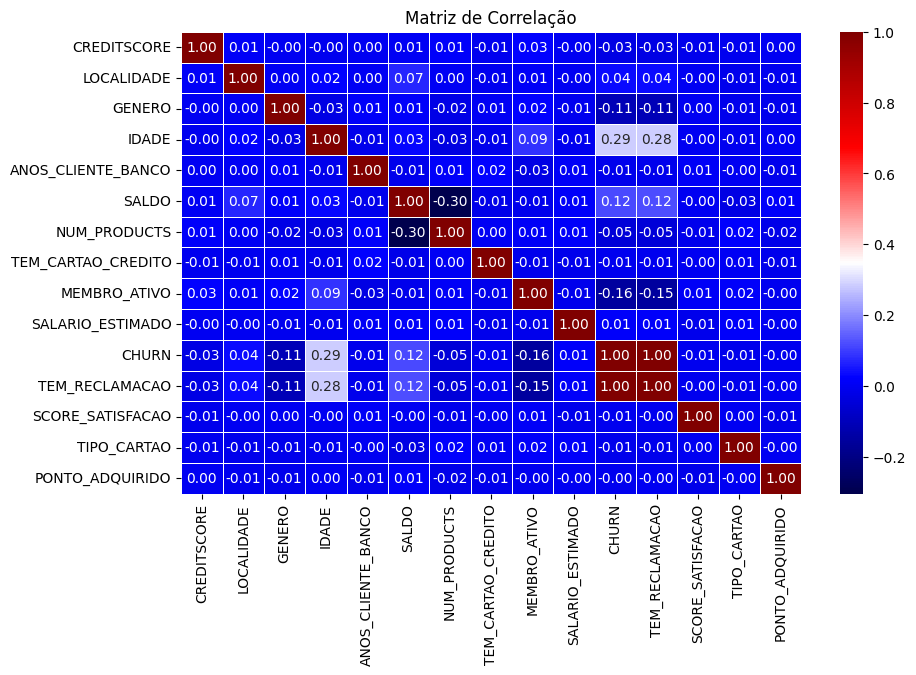

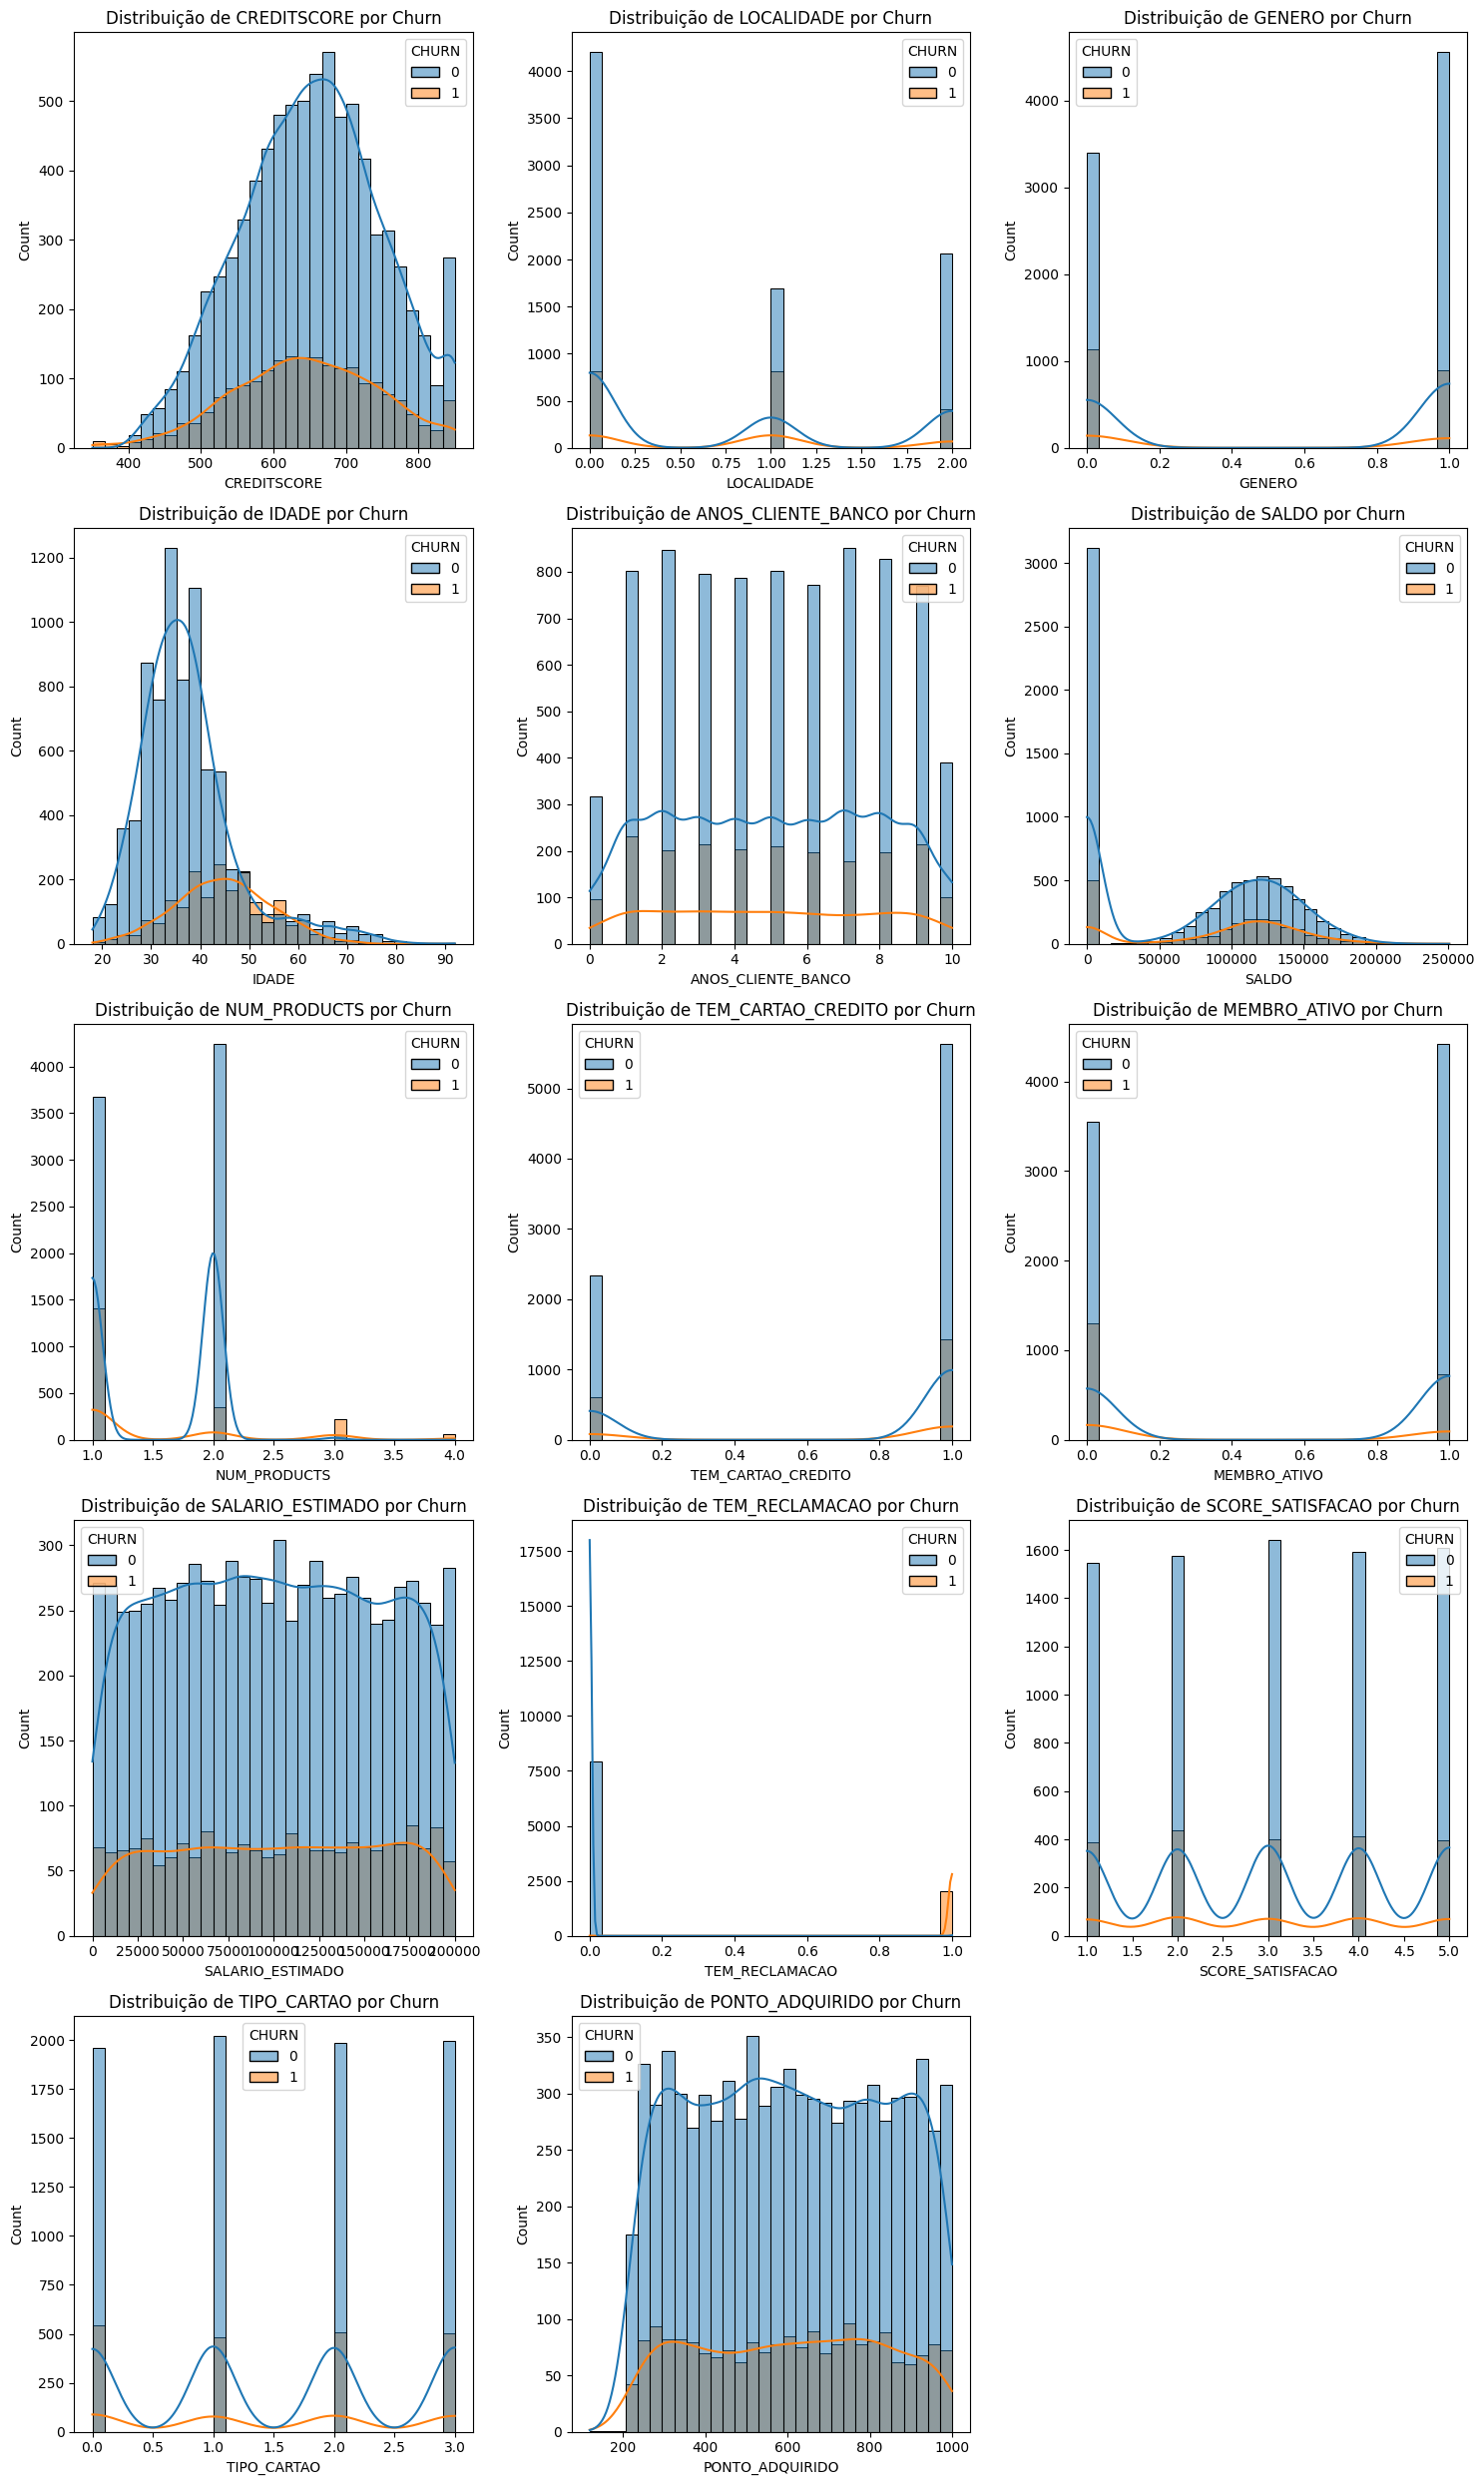

In [4]:
# Carregar os dados

df = load_data('Churn.csv')

# Exibir as primeiras linhas

display(df.head())

# Informações gerais

df.info()

# Estatísticas descritivas

display(df.describe())

# Duplicatas

num_duplicatas = df.duplicated().sum()
print(f'Dados duplicados: {num_duplicatas}')
print('\n')

# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Convertendo as variáveis categóricas
categorical_columns(df)

# Calcular a matriz de correlação
corr_matrix = df.drop(columns=["ID_CLIENTE"]).select_dtypes(include=['number']).corr()

# Plotar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="seismic", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

# Identificar colunas numéricas (exceto a variável alvo e ID_CLIENTE)
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

numerical_features = [col for col in df.select_dtypes(include=["int64", "float64"]).columns 
                      if col not in ["CHURN", "ID_CLIENTE"]]

# Definir número de linhas e colunas para subplots
num_cols = 3

# Definir quantas colunas por linha
num_rows = math.ceil(len(numerical_features) / num_cols) 

# Criar a figura e os eixos

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() 

# Gerar histogramas para cada variável numérica
for i, col in enumerate(numerical_features): 
    sns.histplot(df, x=col, hue="CHURN", bins=30, kde=True, ax=axes[i]) 
    axes[i].set_title(f"Distribuição de {col} por Churn")
# Remover gráficos vazios caso o número de variáveis seja menor que o grid
for j in range(i + 1, len(axes)): 
    fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

## Algumas observações


- CREDITSCORE: Varia de 350 a 850, com média de 650.

- IDADE: Varia de 18 a 92 anos, com média de 39 anos.

- ANOS_CLIENTE_BANCO: Média de 5 anos, variando entre 0 e 10 anos.

- SALÁRIO_ESTIMADO: Média de 100.090, com um máximo de 199.992.

## Sobre a matriz de correlação:

Estatisticamente os únicos valores não desprezíveis na matriz de correlação é entre as variáveis `CHURN` e `IDADE` (0.29), o que indica uma correlação fraca; `CHURN` e `TEM_RECLAMACAO` com correlação muito forte, já que todos os clientes que reclamam são do tipo churn.


## Sobre os gráficos mostrados:

Uma distribuição normal significa que a maioria dos valores dessas variáveis está concentrada em torno da média, com poucos valores extremos para cima ou para baixo.

- Crédito (Credit Score): A maioria dos clientes tem uma pontuação de crédito média, com poucos clientes tendo pontuações muito altas ou muito baixas.

- Idade: A maioria dos clientes está em uma faixa etária central, com menos clientes muito jovens ou muito velhos.

- Saldo bancário: A maior parte dos clientes tem saldos próximos à média, com menos clientes possuindo saldos muito altos ou muito baixos.

Salário estimado e Ponto adquirido se aproximam de uma distribuição uniforme, ou seja, não há uma concentração significativa em faixas salariais específicas e os clientes acumulam pontos de maneira relativamente distribuída.